# Аналіз та візуалізація даних

## Опис

Аналіз результатів обстеження пацієнтів щодо можливих серцево-судинних захворювань (ССЗ).

### Стуктура даних

| Параметр                                               | Назва змінної | Тип даних  |
|--------------------------------------------------------|---------------|------------|
| Вік                                                    | age | int (дні) |
| Зріст                                                  | height | int (см) |
| Вага                                                   | weight | float (кг) |
| Стать                                                  | gender | binary :) |
| Систолічний кров’яний тиск                             | ap_hi | int |
| Діастолічний артеріальний тиск                         | ap_lo | int |
| Холестерин                                             | cholesterol | 1: норма, 2: вище норми, 3: сильно вище норми |
| Глюкоза                                                | gluc | 1: норма, 2: вище норми, 3: сильно вище норми |
| Паління                                                | smoke | binary |
| AlcohoПрийом алкоголю                                  | alco | binary |
| Фізична активність                                     | active | binary |
| Наявність або відсутність серцево-судинних захворювань | cardio | binary |

Усі значення набору даних були зібрані на момент медичного огляду.

## Підготовка

In [ ]:
%%capture
%pip install pandas seaborn plotly

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Читання даних

In [ ]:
#from google.colab import drive                                                   #законектився до власного гугл диску
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/CS/cardio.csv', sep=";")

df = pd.read_csv("https://raw.githubusercontent.com/stivmen4/lab/blob/main/cardio.csv", sep=";")

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Аналіз даних

**Завдання 1**: Скільки чоловіків і жінок присутні в цьому наборі даних? Значення ознаки `gender` не було надано (не відомо, чи `1` означає жінка чи чоловік), але ми можемо припустити, що чоловіки в середньому вищі за жінок.


 Середній зіст: 165 

_________________________________________ 

Man: 	 29721 
Woman: 	 40279
_________________________________________ 



,id,age,is_it_a_woman,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,False,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,True,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,True,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,False,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,True,1,156,56.0,100,60,1,1,0,0,0,0


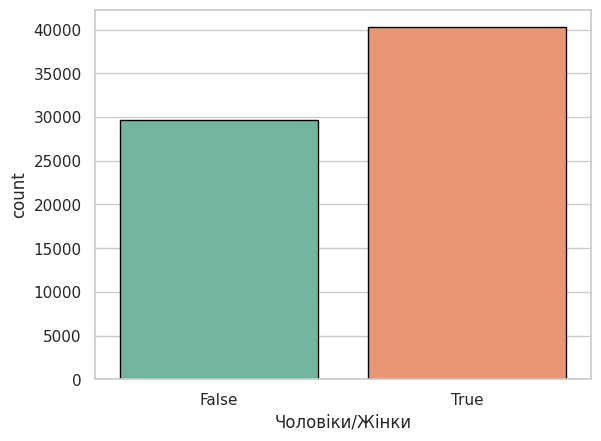

In [ ]:
df.get('height')
df2=math.ceil(df["height"].mean()) #Знаходимо середній зріст у датасеті, всі хто вище порогового значення - чоловіки, нижче -жінки.
print("\n Середній зіст:",df2,"\n")
df.insert(2,"is_it_a_woman", df.height<=df2 ) # створюємо допоміжний стовпець який визначає чи це жіноча стать (True/False)

sns.countplot(x=df['is_it_a_woman'], palette='Set2',edgecolor = 'black')
mask = df['is_it_a_woman'] == False
count = len(df[mask])
print("_________________________________________ \n")
print("Man: \t",count,"\nWoman: \t",len(df)-count)
print("_________________________________________ \n")
plt.xlabel("Чоловіки/Жінки")

#Man: 	 29721
#Woman: 	 40279

df.head()

**Завдання 2**: Яка стать частіше вживає алкоголь - чоловіки чи жінки?

In [ ]:
count = len( df.loc[(df['is_it_a_woman']== False ) & (df['alco']== 1)  ])
count2 = len( df.loc[(df['is_it_a_woman']== True) & (df['alco']== 1) ])
count3 = len( df[ (df['alco']== 1) ])
print("Усі хто виживає алкоголь: \t",count3,"\nЧоловіки що вживають алкоголь: \t",count,"\nЖінки що вживають алкоголь: \t",count2)



Усі хто виживає алкоголь: 	 3764 
Чоловіки що вживають алкоголь: 	 2303 
Жінки що вживають алкоголь: 	 1461


**Завдання 3**: Яка різниця між відсотками курців серед чоловіків і жінок (округлено)?

In [ ]:
count = len( df.loc[(df['is_it_a_woman']== False ) & (df['smoke']== 1)  ])
count2 = len( df.loc[(df['is_it_a_woman']== True) & (df['smoke']== 1) ])
count3 = len( df[ (df['smoke']== 1) ])


people_num = len(df.index)

print("Усі курці: \t",count3,"\nЧоловіки курці: ",count,"Відсоток: ",math.floor((count*100)/people_num),"%","\nЖінки курці: \t",count2,
      "Відсоток: ",math.floor((count2*100)/people_num),"%")
print("_________________________________________ \n")

#Для експеременту знайдемо відсоток курців серед 100 випадкових Чоловіків та Жінок

count3 = len( df[ (df['smoke']== 1) ])
df_smoke_from100=df.sample(n=100, random_state=0)
count23 = len( df_smoke_from100.loc[(df['smoke']== 1)  ])
df_smokeM=df.query('is_it_a_woman == False').sample(n=100, random_state=0)
df_smokeW=df.query('is_it_a_woman == True').sample(n=100, random_state=0)

count21 = len( df_smokeM.loc[(df['smoke']== 1)  ])
count22 = len( df_smokeW.loc[(df['smoke']== 1)  ])
print("Курці зі 100 випадкових чоловіків та жінок: \t",count23,"\nЧоловіки що палять(з 100 rand): \t\t",count21,"%""\nЖінки що палять (з 100 rand): \t\t\t",count22,"%")

Усі курці: 	 6169 
Чоловіки курці:  4364 Відсоток:  6 % 
Жінки курці: 	 1805 Відсоток:  2 %
_________________________________________ 

Курці зі 100 випадкових чоловіків та жінок: 	 14 
Чоловіки що палять(з 100 rand): 		 10 %
Жінки що палять (з 100 rand): 			 4 %


**Завдання 4**: Яка різниця між медіанними значеннями віку для курців і некурців (у місяцях, округлено)? Треба уважно подивитись в чому вимірюється вік (`age`) у цьому наборі даних.

In [ ]:
# У датасеті вік вимірюється в днях.
#Ми знаємо, що 1 рік дорівнює 365.3 день. Це дозволяє нам налаштувати формулу

if 'age_in_years' in df.columns:
  df.drop(df.columns[[2]], axis = 1,inplace = True)
df.insert(2,"age_in_years", df.age /365,3 )
df['age_in_years'] = df['age_in_years'].apply(np.ceil)


df3=df.loc[df['smoke'].isin([1])]
age_smokers=df3['age_in_years'].median()

df4=df.loc[df['smoke'].isin([0])]
age_no_smoke=df4['age_in_years'].median()
#Ми знаємо, що 1 рік дорівнює 12 місяців


print("Значення медіани віку курців в місяцях: \t",int(age_smokers*12),"\tУ роках: ",int(age_smokers),
      "\nЗначення медіани віку НЕкурців в місяцях: \t",int(age_no_smoke*12),"\tУ роках: ",int(age_no_smoke))


Значення медіани віку курців в місяцях: 	 636 	У роках:  53 
Значення медіани віку НЕкурців в місяцях: 	 660 	У роках:  55


**Завдання 5**: Створіть нову колонку – ІМТ ([індекс маси тіла](https://uk.wikipedia.org/wiki/%D0%86%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D0%B8_%D1%82%D1%96%D0%BB%D0%B0)). Для цього розділіть вагу в кілограмах на квадрат зросту в метрах.

Нормальними значеннями ІМТ вважаються від 18,5 до 25.

Використовуючи цю інформацію, дайте відповіть на питання: Чи правда, що у здорових непитущих чоловіків ІМТ ближче до норми, ніж у здорових непитущих жінок?

> Примітка: Відповідь так чи ні, підкріплена даними :)

In [ ]:
#Під терміном "здорових" бодемо вважати тих у кого cholesterol <= 2, тиск від 80 - 120 (ap_hi	ap_lo)

if 'IMT' in df.columns:
  df.drop(df.columns[[2]], axis = 1,inplace = True)
df.insert(2,"IMT", (df.weight) /(df.height/100)**2 )
#df['IMT'] = df['IMT'].apply(np.ceil)
df3=df.loc[df['alco'].isin([0]) & (df['cholesterol']<= 2) & (df['ap_hi']<= 120) & (df['ap_lo']>= 80) ]
Strong_men=df.loc[df['alco'].isin([0]) & (df['cholesterol']<= 2) & (df['ap_hi']<= 120) & (df['ap_lo']>= 80) & (df['height']>165 )  & (df['IMT'] >=18) & (df['IMT'] <=25) ]
Strong_Women=df.loc[df['alco'].isin([0]) & (df['cholesterol']<= 2) & (df['ap_hi']<= 120) & (df['ap_lo']>= 80) & (df['height']<=165 )  & (df['IMT'] >=18) & (df['IMT'] <=25) ]

print( "Здорових не питущих людей: ",len(df3),"\nСеред них з нормальним значенням ІМТ: ","\nЗдорові непитущі чоловіки: \t",len(Strong_men),"\nЗдорові непитущі Жінки: \t",
      len(Strong_Women))

#df.head()
#Відповіть: Ні, оскільки серед здорових та непитущих з нормальним ІМТ переважають Жінки

Здорових не питущих людей:  24907 
Серед них з нормальним значенням ІМТ:  
Здорові непитущі чоловіки: 	 5659 
Здорові непитущі Жінки: 	 5680


## Візуалізація даних

> Можна використовувати або Seaborn або Plotly на ваш вибір.

**Завдання 6**: З нашого попереднього дослідження ми знаємо, що стать кодується значеннями `1` і `2`. Давайте підтвердимо наше попереднє визначення статі графічно, подивившись на середні значення зросту та ваги для кожного значення `gender`.

Створіть *violin plot* за зростом і статтю ([seaborn](https://seaborn.pydata.org/generated/seaborn.violinplot.html)/[plotly](https://plotly.com/python/violin/)).
Для Seaborn можна икористати параметр `hue` для розділення за статтю.

In order for the plot to render correctly, you need to convert your `DataFrame` to *long* format using the `melt()` function from `pandas`. Here is [an example](https://stackoverflow.com/a/41575149/3338479) of this for your reference.

> Щоб графік відтворювався правильно, можливо треба буде перетворити `DataFrame` у *довгий* формат за допомогою функції `melt()`. [Приклад](https://stackoverflow.com/a/41575149/3338479) для довідки.

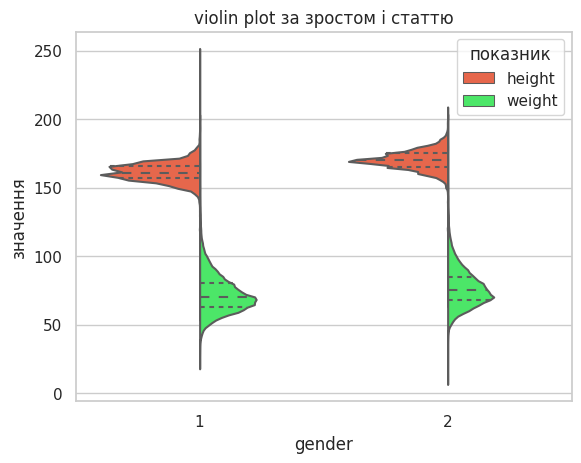

In [ ]:
df_to_show = pd.melt(df, id_vars=['gender'], value_vars=['height', 'weight'], var_name='показник', value_name='значення')
custom_palette = ["#FF5733", "#33FF57"]
sns.set(style="whitegrid")
sns.violinplot(x="gender", y="значення", hue="показник", data=df_to_show, split=True, inner="quart", palette=custom_palette)
plt.title("violin plot за зростом і статтю")



plt.show()

**Завдання 7**: Створіть *count plot* ([seaborn](http://seaborn.pydata.org/generated/seaborn.countplot.html)/[plotly](https://plotly.com/python/histograms/)) із віком на осі `x` і кількістю людей на осі `y`. Ваш результуючий графік повинен мати два стовпці для кожного віку, що відповідає кількості людей для кожного значення `cardio` для цього віку.

Дайте відповідь на питання: Який найменший вік, коли кількість людей із ССЗ перевищує кількість людей без ССЗ?

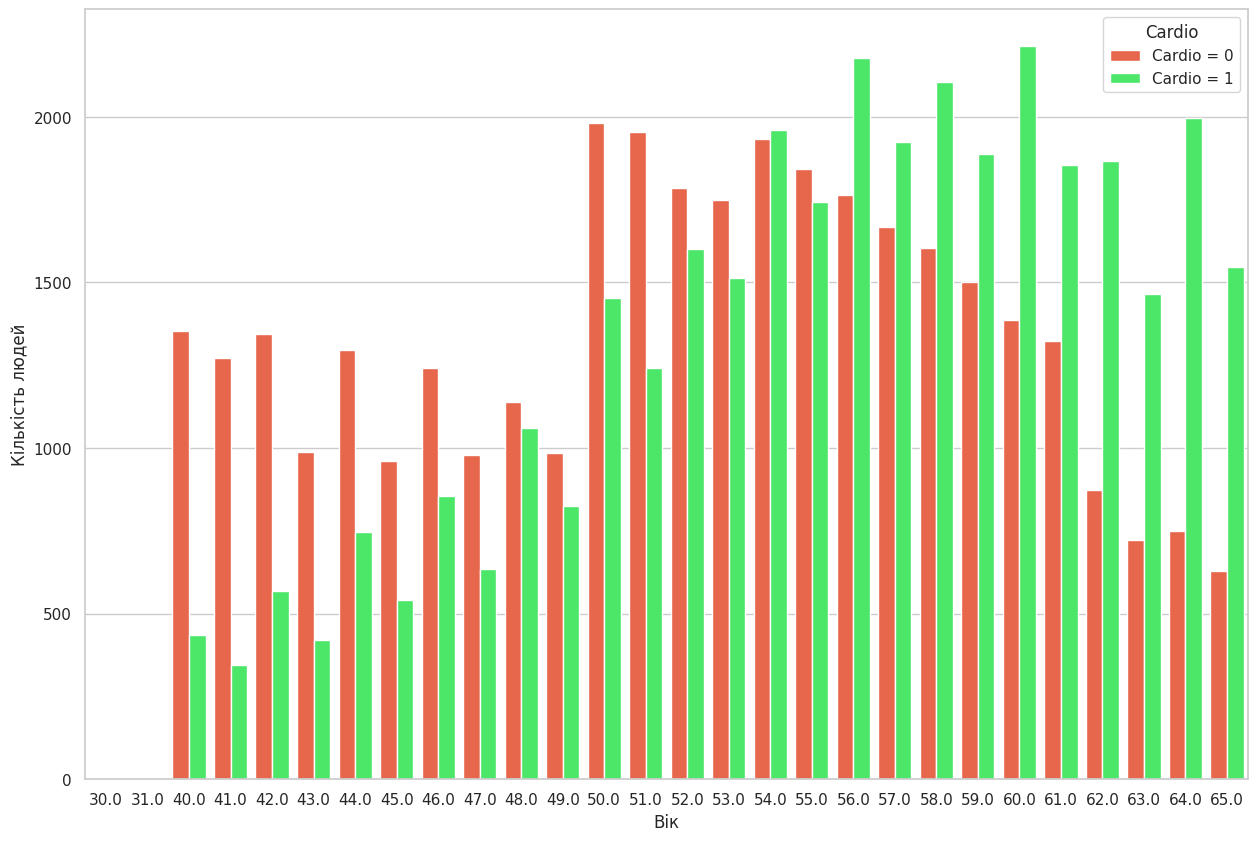

In [ ]:
custom_palette = ["#FF5733", "#33FF57"]

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.countplot(x='age_in_years', hue="cardio", data=df, palette=custom_palette)

plt.xlabel("Вік")
plt.ylabel("Кількість людей")
plt.legend(title="Cardio", labels=["Cardio = 0", "Cardio = 1"])

plt.show()

#Відповідь: виходячи з графіку це 54